# Korki drogowe

## Wstęp 

Równanie opisujące długość korka ma postać
$$ L' = \left( v_{śr} + rL' \right) \cdot n(t) - p(t). $$
Po przekształceniu otrzymujemy
$$ L' = \frac{v_{śr}\cdot n(t) - p(t)}{1 - r\cdot n(t)}. $$

In [1]:
using Plots
using LsqFit

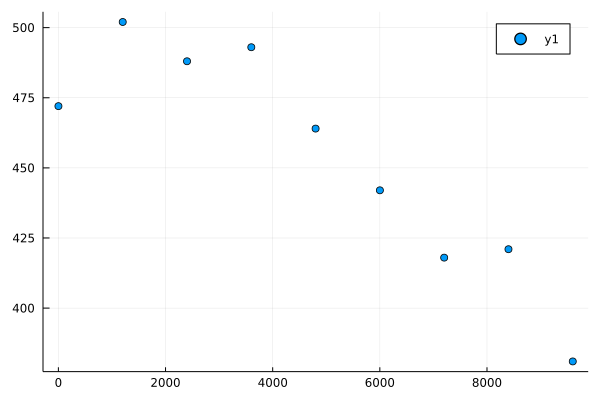

In [41]:
data = [472, 502, 488, 493, 464, 442, 418, 421, 381]
scatter(1:1200:10800, data)

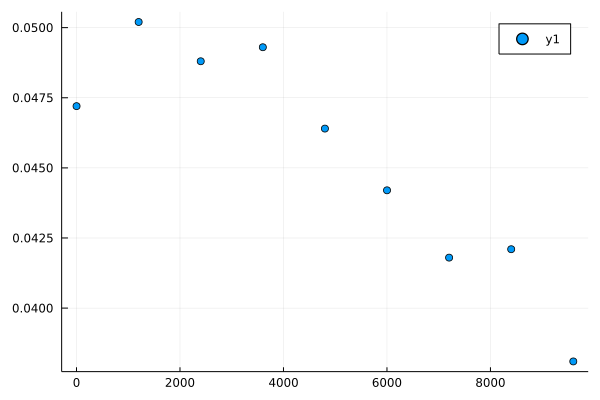

In [42]:
v_śr = 30 * 10/36
n_data = data ./ (v_śr * 1200)
scatter(1:1200:10800, n_data)

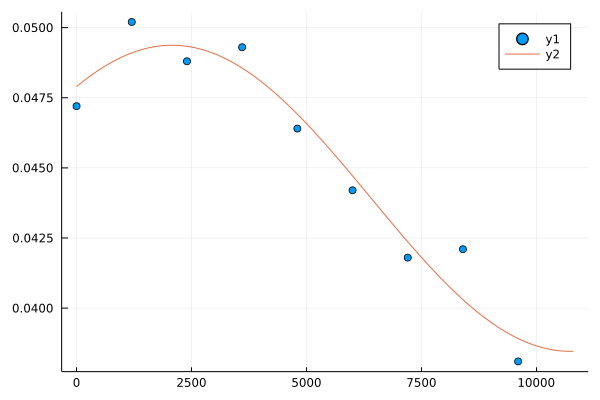

In [43]:
n_mod(x, p) = p[1] .* sin.(p[2] .* x .+ p[3]) .+ p[4]
n_fit = curve_fit(n_mod, 1:1200:10800, n_data, [1.0, 0.003, 1.0, 0.0])

scatter(1:1200:10800, n_data)
T = 1:10800
plot!(T, n_mod(T, n_fit.param))

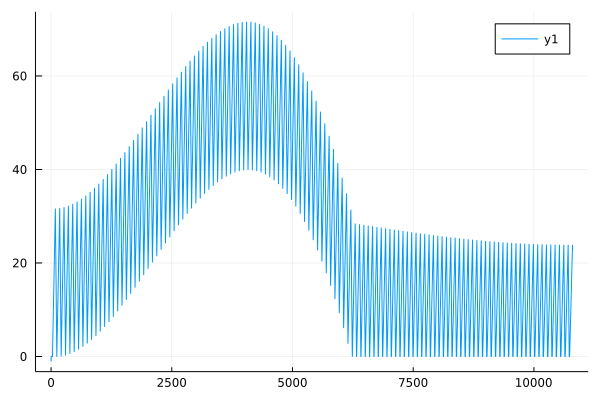

In [50]:
n(x, p) = p[1] * sin(p[2] * x + p[3]) + p[4]

function p(t)
    if t % 90 < 30
        return 1.2
    else
        return 0.0
    end
end

T = 10800
k = 5
dL = (v_śr .* n_mod(1:T, n_fit.param) .- p.(1:T)) ./ (1 .- k .* n_mod(1:T, n_fit.param))

L = [dL[1]]
for t in 2:T
    l = L[t-1] + dL[t]
    if l <= 0
        append!(L, 0)
    else
        append!(L, l)
    end
end

plot(1:T, L)